# Invoice Extraction with YOLOv5

References used:  
https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/  
https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

The model is present in the following link (you can git clone the repository):  
https://github.com/ultralytics/yolov5

**Steps to do Object Detection with YOLOv5:**
1. Collect sample images and convert to .jpg form
2. Image annotation
3. Create dataset
4. Clone repository and create workspace
5. Select model
6. Train
7. Test

**Number of samples = 40 images**

## 1. PREPROCESSING

**To convert from pdf to image**:  
  
Modules Required:
- pdf2image 1.14.0: This module converts a PDF to a PIL object. (pip install pdf2image)
- poppler: This module allows to read, render, or modify PDF documents. (apt-get install poppler-utils)

In [ ]:
# USAGE: name, paths, count = get_paths(path_to_folder)
#        convert(paths, name, save, count)

from pdf2image import convert_from_path
import os

#Function returns name of .pdf files and path to the file.
#file = path to folder containing all .pdf files
def get_paths(folder):
    name = [] 
    paths = []
    count = 0
    for file in os.listdir(folder):
        if file.endswith(".pdf"):
            name.append(f[:-4])
            paths.append(folder+'/'+f)
            count = count+1
    return name, paths, count



#Function to convert pdf to image
#pdf_path = path to .pdf file
#name = name of the .pdf file
#save = path to directory where image is to be stored
def convert(paths, name, save, count):
    for i in range(count):
        pdf_path = paths[i]
        file_name = name[i]
        images = convert_from_path(pdf_path)
        for j in range(len(images)):
            images[i].save(save + '/' + file_name + '_' + str(j) +'.jpg', 'JPEG')

## 2. IMAGE ANNOTATION

*Done using Makesense.AI*  
  
Labels:
1. Keyword
2. Bill_from
3. Bill_to
4. Date
5. Invoice_number
6. Purchase_number
7. Total
8. Details
9. Balance
10. Tax
  
For YOLO: .txt files

## 3. CREATE DATASET

*Done on Roboflow*  
  
Train = 0.7  
Validation = 0.2  
Test = 0.1  
  
Addition preprocessing:  
- Resize: Stretch to 416x416 (input size for YOLOv5)
- Data Augmentation:
 - 90° Rotate: Clockwise, Counter-Clockwise
 - Crop: 0% Minimum Zoom, 20% Maximum Zoom
  
Final Dataset = 96 images + corresponding annotations (.txt)  

**Heat Map of entire dataset:**

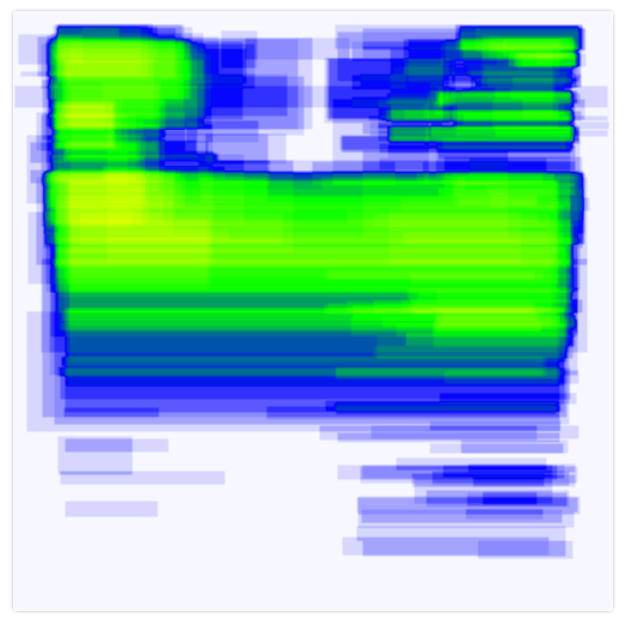

In [1]:
from PIL import Image
im = Image.open(r"/home/ec2-user/SageMaker/Other/HeatMap.png")
im.show()

## 4. CLONE REPOSITORY

In [ ]:
#Commands:
git clone https://github.com/ultralytics/yolov5
cd yolov5
pip install -r requirements.txt

**Requirements:**   
- matplotlib>=3.2.2  
- numpy>=1.18.5  
- opencv-python>=4.1.2  
- Pillow>=8.0.0
- PyYAML>=5.3.1
- scipy>=1.4.1
- torch>=1.7.0
- torchvision>=0.8.1
- tqdm>=4.41.0
- tensorboard>=2.4.1
- seaborn>=0.11.0
- pandas


**Workspace should look as below:**

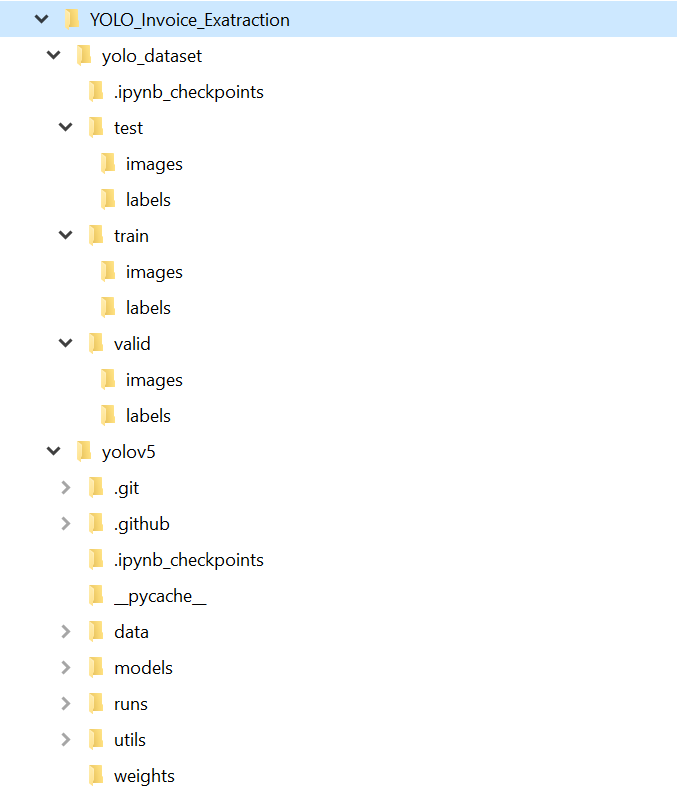

In [2]:
im = Image.open(r"/home/ec2-user/SageMaker/Other/workspace.png")
im.show()

## 5. MODEL SELECTION

**Available Models:**  

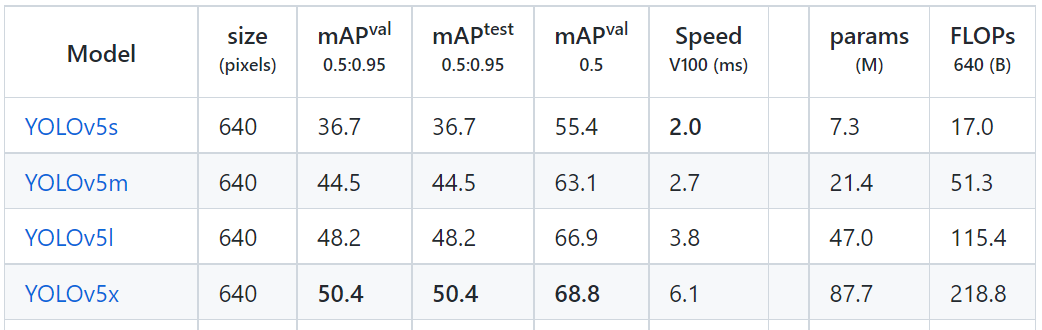

In [3]:
im = Image.open(r"/home/ec2-user/SageMaker/Other/models.png")
im.show()

**Models used:**
1. YOLOv5s (small)
2. YOLOv5l (large)

## 6. TRAINING & TESTING

Before training, we need to create a .yaml file containing details related to paths to the images and the classes of labels.  
  
Below is the .yaml contents  

In [ ]:
path: /home/ec2-user/SageMaker/yolo_dataset
train: /home/ec2-user/SageMaker/yolo_dataset/train/images
val: /home/ec2-user/SageMaker/yolo_dataset/valid/images
test: /home/ec2-user/SageMaker/yolo_dataset/test/images

nc: 10
names: ['Keyword', 'Bill_from', 'Bill_to', 'Date', 'Invoice_number', 'Purchase_number', 'Total', 'Details', 'Balance', 'Tax']

### 6. 1 YOLOv5s

PATH_TO_YAML = ../yolo_dataset/data.yaml

In [ ]:
#Command to run:
#Run within yolov5 directory
python train.py --img 416 --batch 4 --epochs 100 --data [PATH_TO_YAML] --weights yolov5s.pt

The weights being used are the pre-trained models weights from being trained on the MSCOCO Dataset. The entire model get trained on the custom dataset and updates the weights.

OUTPUT:  
100 epochs completed in 0.255 hours.  
  
**Results:**  
*within folder: ../yolov5/runs/train/exp2*

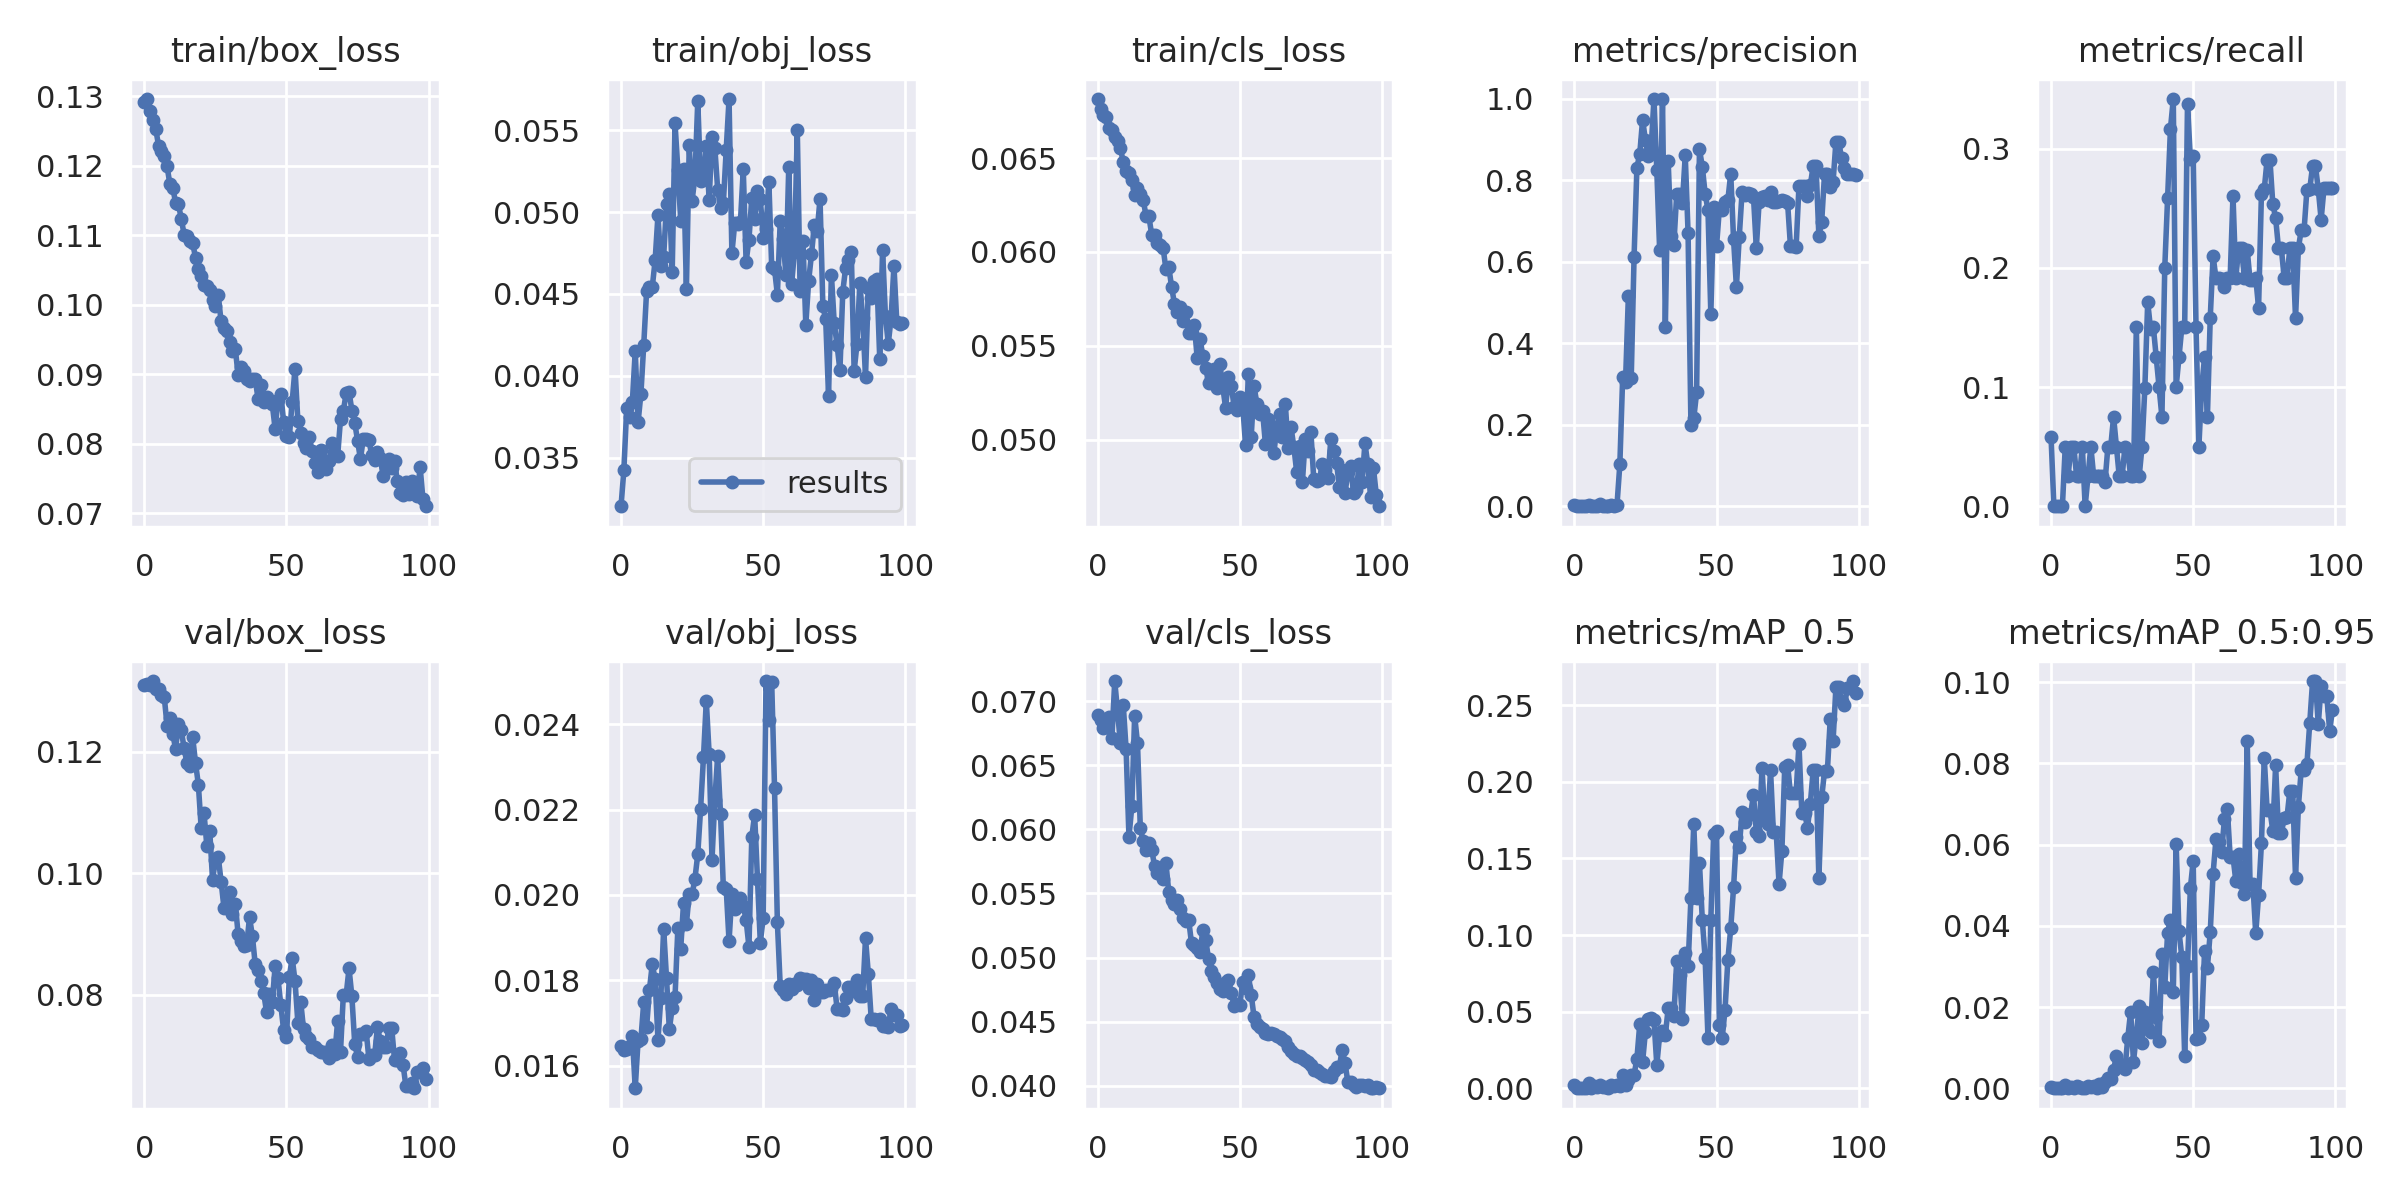

In [4]:
im = Image.open(r"/home/ec2-user/SageMaker/yolov5/runs/train/exp2/results.png")
im.show()

The weights are stored in: yolov5/runs/train/exp3/weights/best.pt

conf = Model Confidence: Initially used 0.4, however 0.25 is giving best results

In [ ]:
#Command to test:
python detect.py --weights [PATH_TO_WEIGHTS] --img 416 --conf 0.25 --source [PATH_TO_IMAGES]

PATH_TO_WEIGHTS : ../yolov5/runs/train/exp2/weights/best.pt  
PATH_TO_IMAGES :  ../yolo_dataset/test/images

**Results:**  
*Within folder ../yolov5/runs/detect/exp4*

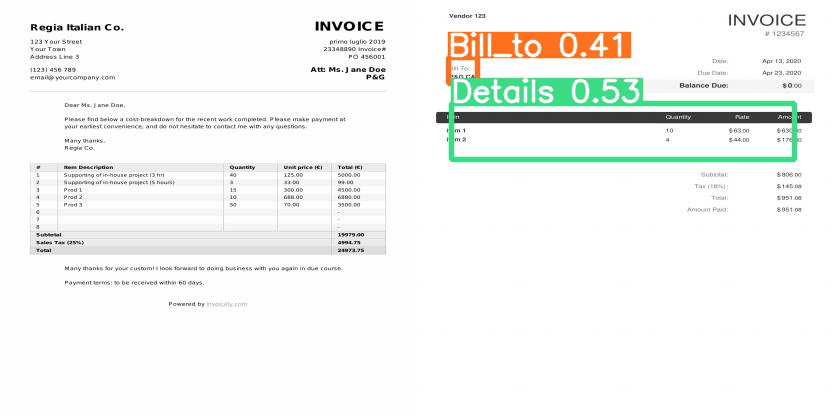

In [5]:
import numpy as np

im1 = Image.open('/home/ec2-user/SageMaker/yolov5/runs/detect/exp4/19_0_jpg.rf.2ab46a21263423849b46a2837153a592.jpg')
im2 = Image.open('/home/ec2-user/SageMaker/yolov5/runs/detect/exp4/5_0_jpg.rf.e3177cd2d73a52a70db7da4c2cf7b2d3.jpg')

Image.fromarray(np.hstack((np.array(im1),np.array(im2)))).show()

## 6.2 YOLOv5l

In [ ]:
#Command to run
#Run inside yolov5 directory
python train.py --img 416 --batch 4 --epochs 100 --data [PATH_TO_YAML] --weights yolov5l.pt

OUTPUT:  
100 epochs completed in 1.399 hours.  
  
**Results:**  
*within folder: ../yolov5/runs/train/exp3*

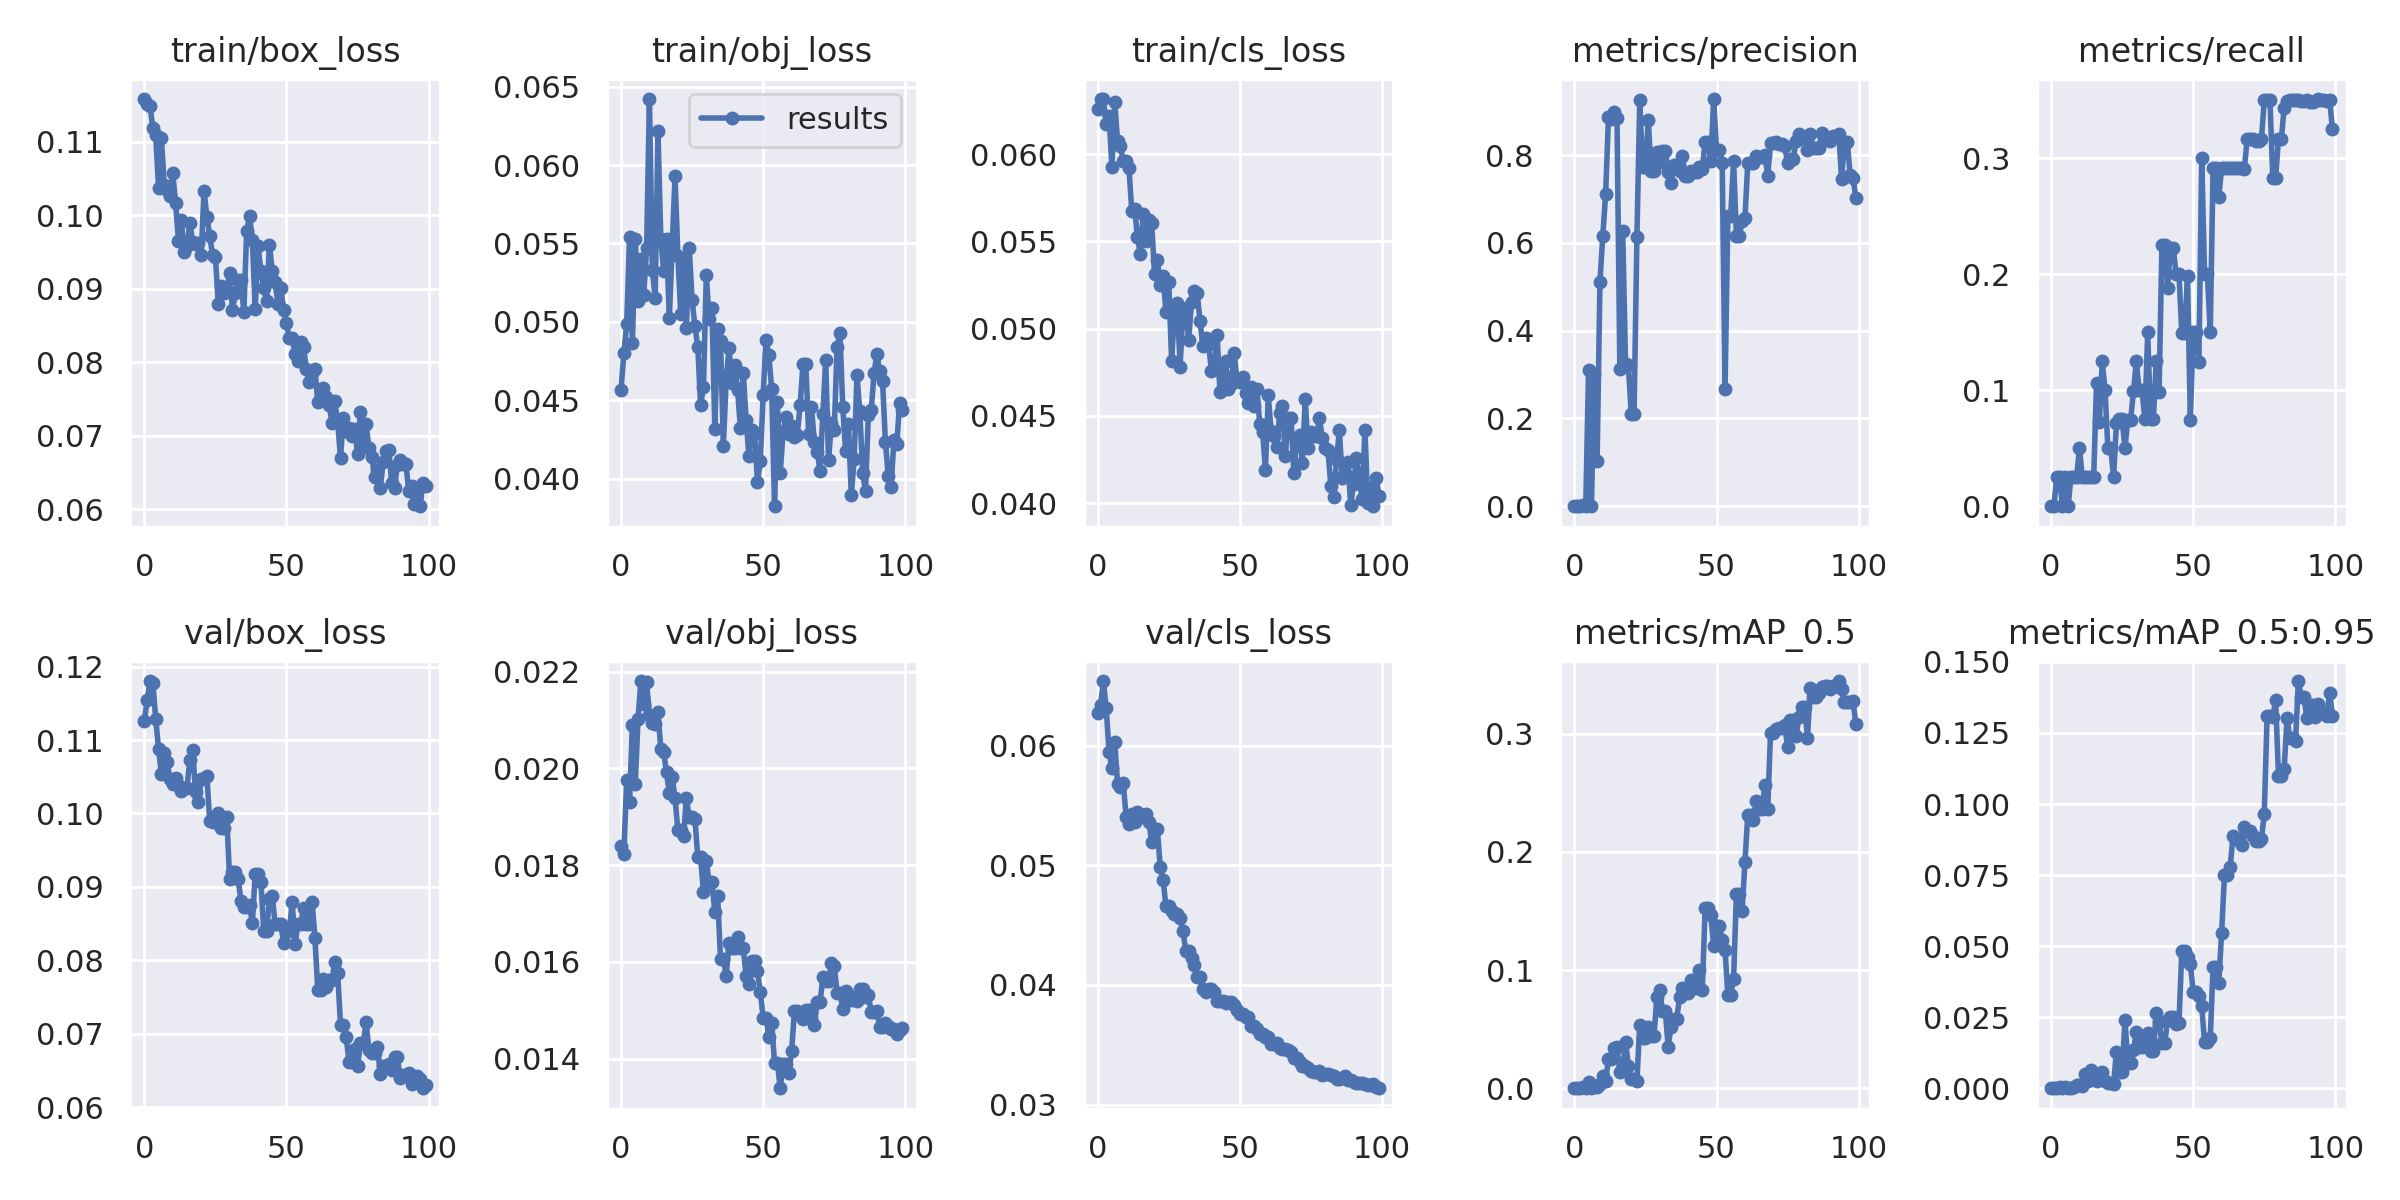

In [6]:
im = Image.open(r"/home/ec2-user/SageMaker/yolov5/runs/train/exp3/results.png")
im.show()

In [ ]:
#Command to test:
python detect.py --weights [PATH_TO_WEIGHTS] --img 416 --conf 0.25 --source [PATH_TO_IMAGES]

PATH_TO_WEIGHTS : ../yolov5/runs/train/exp3/weights/best.pt  
PATH_TO_IMAGES :  ../yolo_dataset/test/images

**Results:**  
*Within folder ../yolov5/runs/detect/exp7*

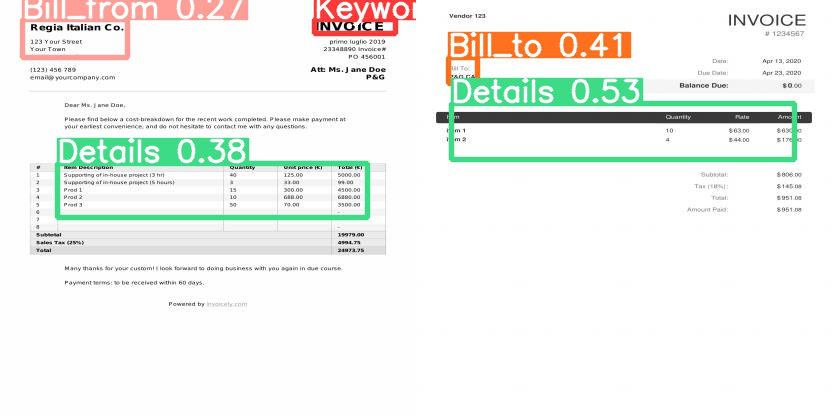

In [7]:
import numpy as np

im1 = Image.open('/home/ec2-user/SageMaker/yolov5/runs/detect/exp7/19_0_jpg.rf.2ab46a21263423849b46a2837153a592.jpg')
im2 = Image.open('/home/ec2-user/SageMaker/yolov5/runs/detect/exp7/5_0_jpg.rf.e3177cd2d73a52a70db7da4c2cf7b2d3.jpg')

Image.fromarray(np.hstack((np.array(im1),np.array(im2)))).show()

## 6.3 YOLOv5x

OUTPUT:  
100 epochs completed in 6.716 hours.  
  
**Results:**  
*within folder: ../yolov5/runs/train/exp4*

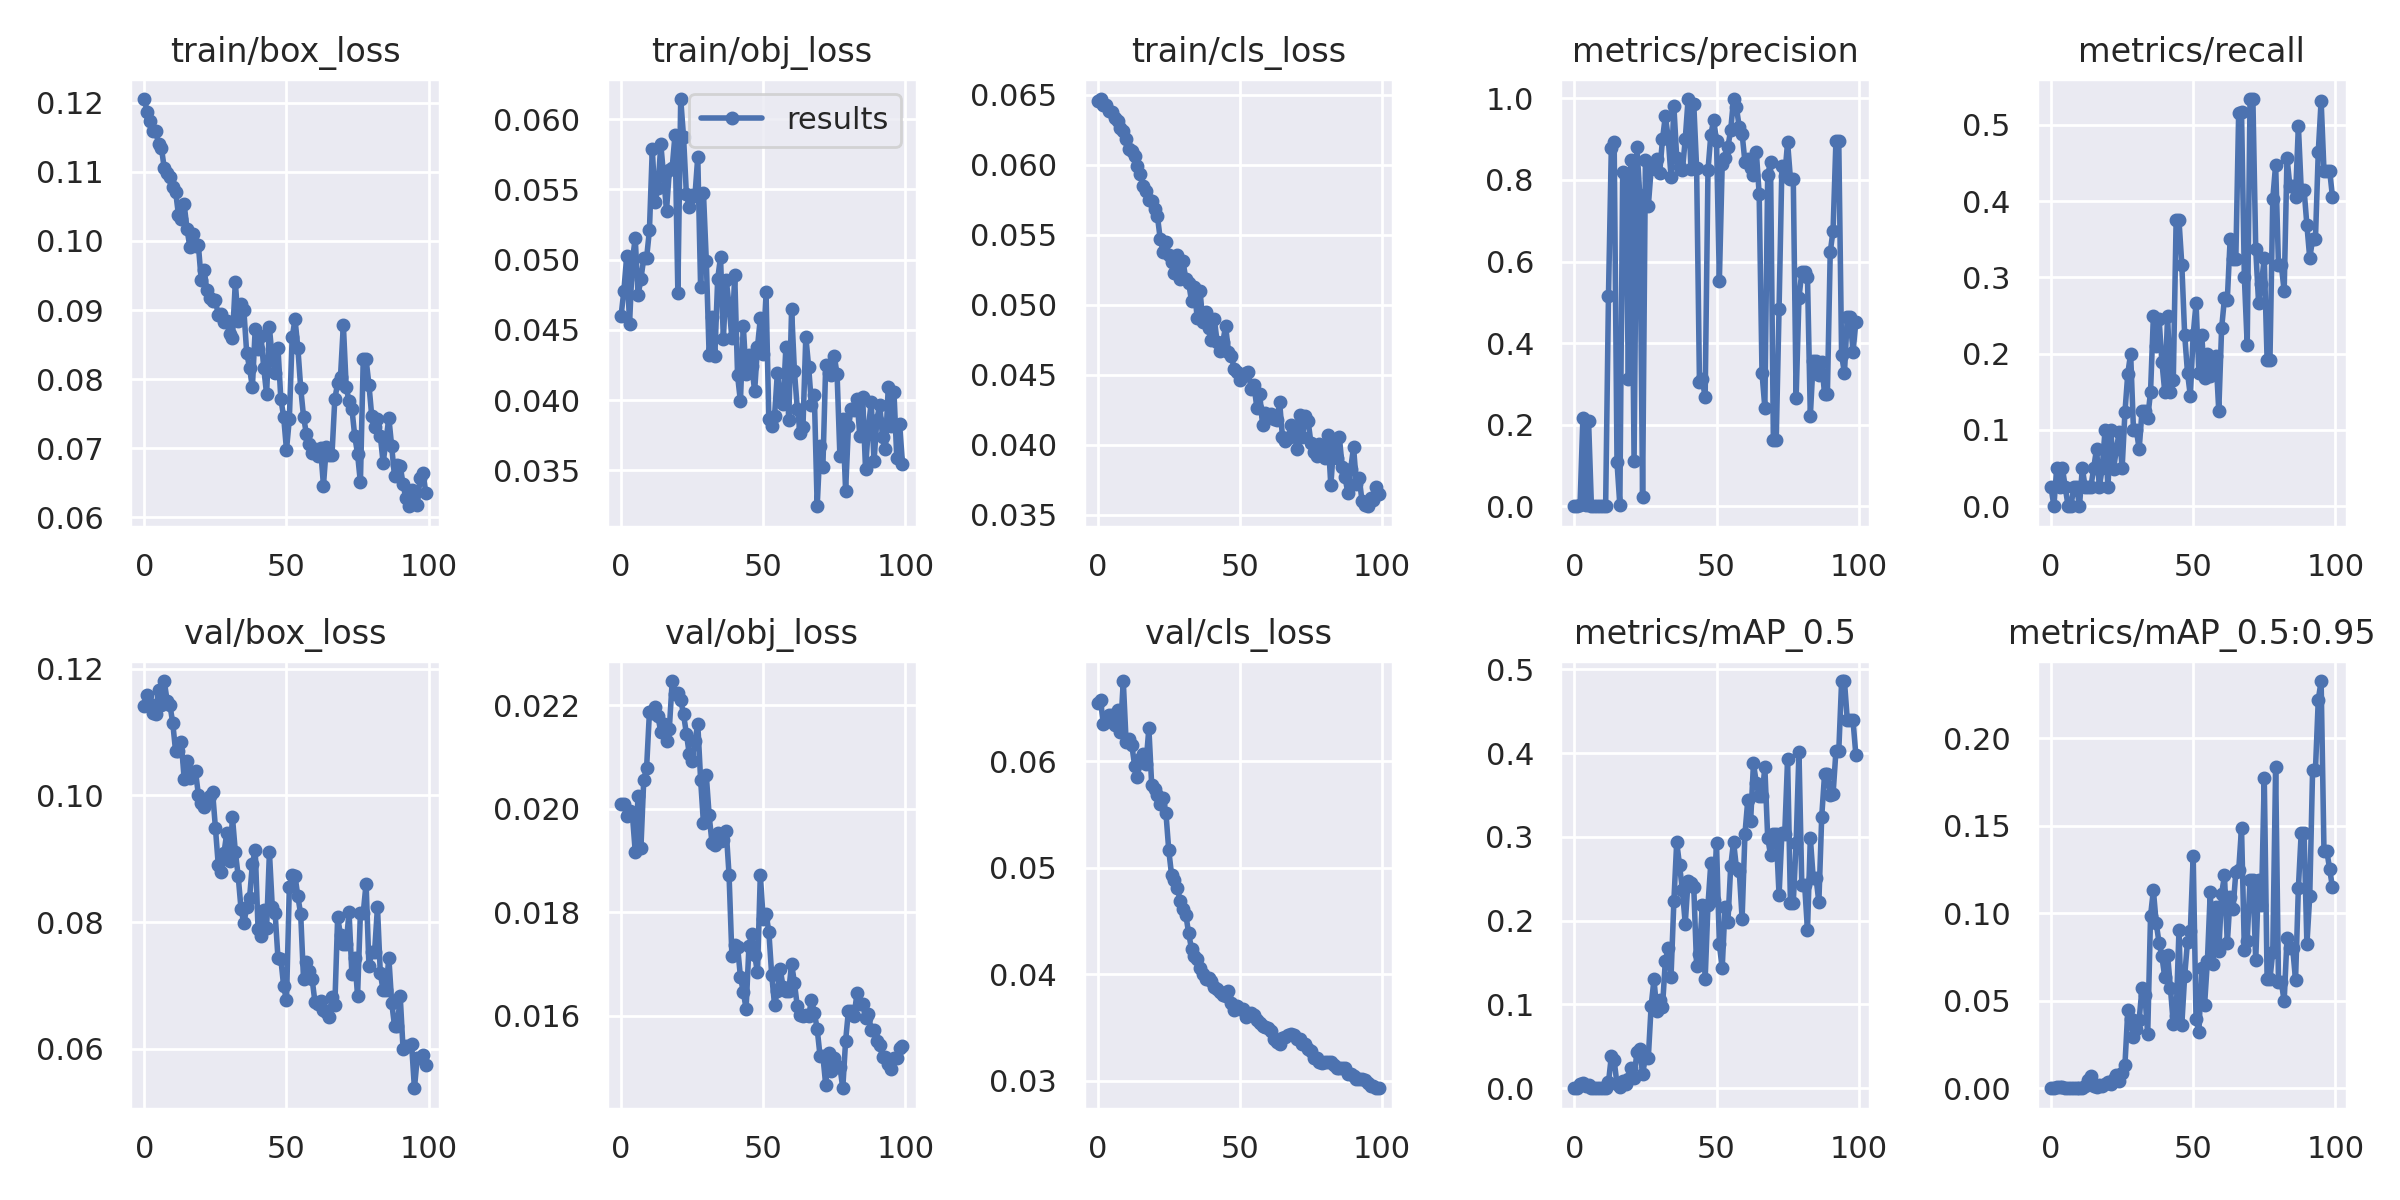

In [1]:
from PIL import Image
im = Image.open(r"/home/ec2-user/SageMaker/yolov5/runs/train/exp4/results.png")
im.show()

In [ ]:
#Command to test:
python detect.py --weights /home/ec2-user/SageMaker/yolov5/runs/train/exp4/weights/best.pt --img 416 --conf 0.25 --source /home/ec2-user/SageMaker/yolo_dataset/test/images

**NOTE:** For best results use conf = 0.20

PATH_TO_WEIGHTS : ../yolov5/runs/train/exp4/weights/best.pt  
PATH_TO_IMAGES :  ../yolo_dataset/test/images

**Results:**  
*Within folder ../yolov5/runs/detect/exp9*

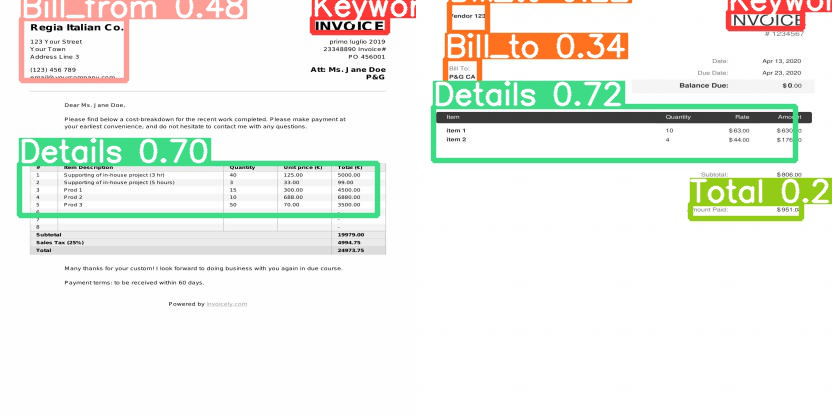

In [5]:
from PIL import Image
import numpy as np

im1 = Image.open('/home/ec2-user/SageMaker/yolov5/runs/detect/exp10/19_0_jpg.rf.2ab46a21263423849b46a2837153a592.jpg')
im2 = Image.open('/home/ec2-user/SageMaker/yolov5/runs/detect/exp10/5_0_jpg.rf.e3177cd2d73a52a70db7da4c2cf7b2d3.jpg')

Image.fromarray(np.hstack((np.array(im1),np.array(im2)))).show()

This model shows higher confidence scores and predicts more labels as well.

## CONCLUSION:

In [6]:
import pandas as pd

c = ['Model','Training Time', 'Performace']

data = {'Model':['YOLOv5s', 'YOLOv5l', 'YOLOv5x'],
        'Training Time':['0.255 hours', '1.399 hours', '6.716 hours'],
        'Performance':['0 or 1 label out of 10', '2 or 3 labels out of 10', 'at least 3 labels with higher confidence score']}

df = pd.DataFrame(data)
print(df)

     Model Training Time                                     Performance
0  YOLOv5s   0.255 hours                          0 or 1 label out of 10
1  YOLOv5l   1.399 hours                         2 or 3 labels out of 10
2  YOLOv5x   6.716 hours  at least 3 labels with higher confidence score
